In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

In [11]:
# Chargement et nettoyage
df = pd.read_csv('Airbnb_Open_Data.csv')
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df = df.dropna(subset=['price', 'number of reviews'])

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ethan\AppData\Local\Temp\ipykernel_14740\4288649453.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\ethan\AppData\Local\Temp\ipykernel_14740\4288649453.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


Kurtosis du prix : -1.19
Kurtosis du nombre de reviews : 25.05


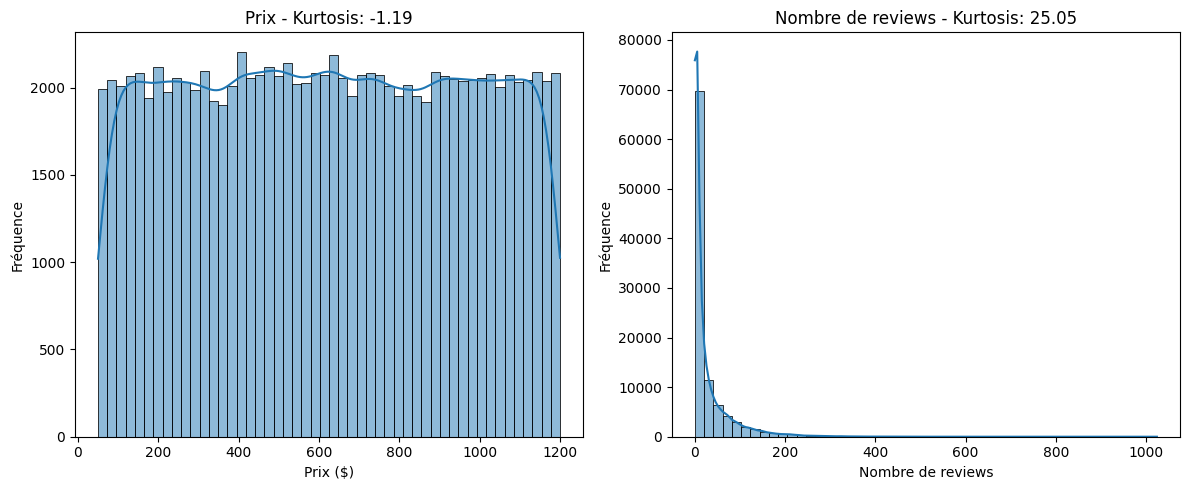

In [12]:
# Calcul de la kurtosis
kurt_price = kurtosis(df['price'], fisher=True)  # fisher=True pour excès de kurtosis (0 = normal)
kurt_reviews = kurtosis(df['number of reviews'], fisher=True)

print(f"Kurtosis du prix : {kurt_price:.2f}")
print(f"Kurtosis du nombre de reviews : {kurt_reviews:.2f}")

# Histogrammes avec KDE (densité) pour visualiser la forme
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['price'], bins=50, kde=True)
plt.title(f'Prix - Kurtosis: {kurt_price:.2f}')
plt.xlabel('Prix ($)')
plt.ylabel('Fréquence')

plt.subplot(1,2,2)
sns.histplot(df['number of reviews'], bins=50, kde=True)
plt.title(f'Nombre de reviews - Kurtosis: {kurt_reviews:.2f}')
plt.xlabel('Nombre de reviews')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

Kurtosis des prix par quartier :
neighbourhood group
Brooklyn    -1.192622
Manhattan   -1.192629
Queens      -1.213875
Name: price, dtype: float64


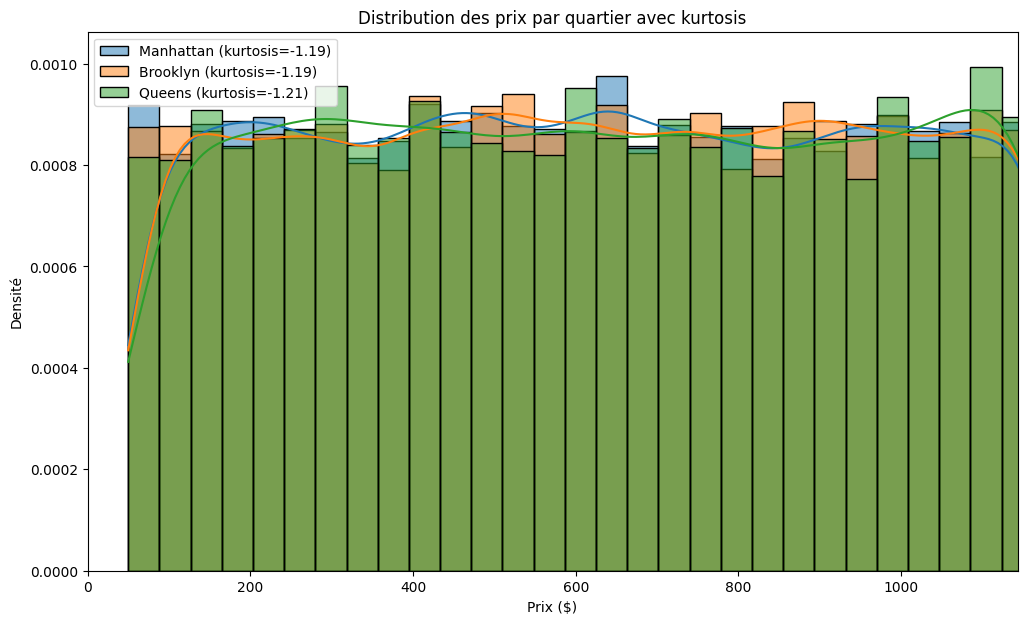

In [19]:
quartiers = ['Manhattan', 'Brooklyn', 'Queens']
df_subset = df[df['neighbourhood group'].isin(quartiers)]

# Calculer la kurtosis par quartier
kurtosis_values = df_subset.groupby('neighbourhood group')['price'].apply(lambda x: kurtosis(x, fisher=True, nan_policy='omit'))
print("Kurtosis des prix par quartier :")
print(kurtosis_values)

# Tracer histogramme + KDE pour chaque quartier avec légende de la kurtosis
plt.figure(figsize=(12, 7))
for quartier in quartiers:
    subset = df_subset[df_subset['neighbourhood group'] == quartier]
    sns.histplot(subset['price'], kde=True, stat='density', label=f"{quartier} (kurtosis={kurtosis_values[quartier]:.2f})", bins=30, alpha=0.5)

plt.title("Distribution des prix par quartier avec kurtosis")
plt.xlabel("Prix ($)")
plt.ylabel("Densité")
plt.xlim(0, df['price'].quantile(0.95))  # limiter aux 95% premiers centiles
plt.legend()
plt.show()